In [17]:
import pandas as pd
import numpy as np
from dtw import dtw
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['dist']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [18]:
data.head()

,Temp,Spd,Prcp,mean_duration,num_trips
day_x,,,,,
2011-01-01,3.250000,2.987500,0.0,NaN,NaN
2011-01-02,5.732353,2.255882,4.8,NaN,NaN
2011-01-03,1.200000,8.285714,5.8,NaN,NaN
2011-01-04,0.570833,4.116667,0.0,NaN,NaN
2011-01-05,1.620833,5.245833,0.0,NaN,NaN


In [22]:
data=weather=pd.read_csv('bike_weather2.csv', header=0)
data=data.drop(['Unnamed: 0','day_y'],axis=1)
data=data.set_index('day_x')
data=data.dropna()
data.head()

,Temp,Spd,Prcp,merge_date,mean_duration,num_trips
day_x,,,,,,
2013-07-01,22.834211,4.992105,58.8,20130701,978.599279,16650.0
2013-07-02,23.210345,5.800000,1.6,20130702,958.129567,22745.0
2013-07-03,23.536364,4.724242,27.1,20130703,974.328485,21864.0
2013-07-04,24.679310,4.282759,6.3,20130704,1273.108439,22326.0
2013-07-05,25.992000,4.804000,0.0,20130705,1082.426609,21842.0


In [49]:
x=np.array(data['mean_duration']).reshape(-1, 1)
y=np.array(data['Temp']).reshape(-1, 1)

In [50]:
x

array([[ 978.59927928],
       [ 958.12956694],
       [ 974.32848518],
       ..., 
       [ 654.90071953],
       [ 743.40261921],
       [ 790.34617141]])

In [51]:
y

array([[ 22.83421053],
       [ 23.21034483],
       [ 23.53636364],
       ..., 
       [ -9.00833333],
       [ -6.50294118],
       [ -8.26538462]])

In [52]:
x=np.array(data['mean_duration']).reshape(-1, 1)
y=np.array(data['Temp']).reshape(-1, 1)

dist, cost, acc, path = dtw(x, y, lambda x, y: np.linalg.norm(x - y, ord=2))
print(dist)

455.420813921


In [53]:
path

(array([   0,    1,    2, ..., 1456, 1457, 1458]),
 array([   0,    1,    2, ..., 1456, 1457, 1458]))

(-0.5, 1458.5)

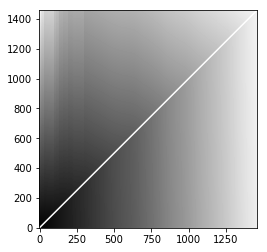

In [54]:
imshow(acc.T, origin='lower', cmap=cm.gray, interpolation='nearest')
plot(path[0], path[1], 'w')
xlim((-0.5, acc.shape[0]-0.5))
ylim((-0.5, acc.shape[1]-0.5))